# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pylab 
import math
df = pd.read_csv('human_body_temperature.csv')

In [3]:
# Your work here.
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [23]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Q1. Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population

Given that temperature comes from a population that is normally distributed, let us test the following hypothesis
Test H0: Distribution is normal VS H1: Distribution is normal at alpha =0.05


In [30]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Since p-value is not less than 0.05, we do not reject the null Hypothesis
Hence the distribution is normal.

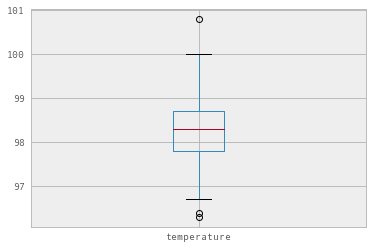

In [31]:
#Another way to check if data is normal is by plotting a box plot
box_plot = df.boxplot(column ='temperature')
box_plot

As seen above the median roughly cuts the data symmetrically along the centre, hence we can conclude that the data is normally distributed
We can also use a QQ plot to determine if a sample is normally distributed. In the graph below, it seems the sample is normal.

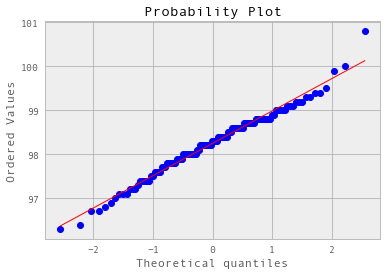

In [36]:
scipy.stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

Q2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

Since the sampling distibution of the sample mean follows Normal$(\sigma_\bar{x},\mu_\bar{x})$ , to test if the sample size is sufficiently large, let us check the ideal sample size assuming we chose a 95% confidence level with equal tails, then we can write the function error with respect to sample size n, such that   $e = z_{a/2}\frac{\sigma}{\sqrt{n}}$. 
We do not know the population standard deviation, so we have to use sample standard deviation, such that, $e = z_{\alpha/2}\frac{s}{\sqrt{n}}$. 

We can compute z first with 95% with equal tails:

In [40]:
z_critical = stats.norm.ppf(q = 0.975)
z_critical

1.959963984540054

Since the population standard deviation is not given, we use the best estimate of the population S.D which is the sample S.D:

In [41]:
sd_sample = np.std(df['temperature'])
sd_sample

0.7303577789050377

In [42]:
margin_of_error = z_critical * (sd_sample/math.sqrt(len(df.temperature)))
margin_of_error

0.12554865777413815

In [43]:
Necessary_Sample_Size = (z_critical*sd_sample)**2/ (margin_of_error)**2
Necessary_Sample_Size

129.99999999999997

If we want the error (the difference between our sample mean and true population mean less than 0.15), we can compute n for the error margin:

In [87]:
n = (z_critical*sd_sample / 0.15)**2
n

91.072022709128703

Accordingly, sample size of 130 is sufficient. Hence, we conclude that the sample size is sufficiently large, as for independence of observations, we will require more data on how the experiment was conducted to make this conclusion. For the purpose of this excercise we will assume the observations are independent since the observations are body temeratures taken from individual people independent of other people.

Q3. Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?

In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

We can set up a hypothesis test such that $H_0: \mu = 98.6$ vs $H_1: \mu \neq 98.6$.  
As we are quite confident with the sample size on which CLT is built on, we can use CLT such that:
$\frac{(\bar{x} - \mu)}{s / \sqrt{n}} \sim N(0,1)$

Since the sample is drawn from a population following a Normal distribution, the sampling distribution of sample means $\bar{x}$ will follow the normal distibution with a Standard Deviation of ${s / \sqrt{n}}$, we ue the zz statistic instead of tt since n >30

Now, under the null hypothesis, we want to test if the population mean = 98.6, the sample mean however:

In [50]:
sample_mean = np.mean(df.temperature)
sample_mean

98.24923076923078

In [47]:
root_n = np.sqrt(len(df.temperature))
root_n

11.401754250991379

In [51]:
z = (sample_mean - 98.6)/(sd_sample/root_n)
z

-5.4759252020781162

The values of the critical Z-score falls outside of the range for a CL = 95% (-1'96,1.96), then the pattern exhibited is probably too unusual to be just another version of random chance. If this is the case, it is possible to reject the null hypothesis and proceed to calculate the CI and the p-value. Here we have significant means to say that the population mean is not 98.6

In [57]:
sd_above = (stats.norm(0,1).ppf(1 - ((1 - 0.95)/2))) * (sd_sample/root_n)
print(sd_above)

0.125548657774


In [59]:
sd_below = -1 * sd_above
sd_below

-0.12554865777413815

In [70]:
upper_limit = df.temperature.mean()+sd_above
lower_limit = df.temperature.mean()+sd_below
upper_limit = round(upper_limit, 3)
lower_limit = round(lower_limit, 3)

In [71]:
print("The confidence interval is (" + str(lower_limit) + ", " + str(upper_limit) + ")")

The confidence interval is (98.124, 98.375)



We are 95% confident that the true population mean is between 98.123 degrees and 98.374 degrees

Would you use a one-sample or two-sample test? Why?
Since we are not comparing two individual groups here we will use the one-sample test.

In this situation, is it appropriate to use the t or z statistic?
Since the sample size is large (far greater than 30) the sample distribution can be assumbed to be normal and hence we can use the z statistic instead of a t statistic.
Now try using the other test. How is the result be different? Why?

In [64]:
#Using the t test:
t = (np.mean(df.temperature) - 98.6) / (sd_sample / root_n)
t

-5.4759252020781162

In [65]:
p = stats.t.cdf(t, df = len(df) - 1) * 2
p

2.1887464624095175e-07

Since the p value is less than alpha = 0.05 we reject the null hypothesis that population mean = 98.6

Q4. At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [72]:
print("The 95% confidence interval for the population mean is (" + str(lower_limit) + ", " + str(upper_limit) + ")")

The 95% confidence interval for the population mean is (98.124, 98.375)


In [84]:
print("The margin of error is " + str(margin_of_error) + "")

The margin of error is 0.125548657774


Q5. Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

We can use the two sample z test because we like to compare if the means from both groups are sigificantly different from another. We write $H_0: \mu_m - \mu_f = 0$ vs $H_1: \mu_m - \mu_f \neq 0$. We use the test statistic $ z = \frac{\bar{x}_m - \bar{x}_f}{\sqrt{\frac{s_m^2}{n_m} + \frac{s_f^2}{n_f} }}$, which follows a S.N distribution.

In [92]:
mean_female = np.mean(df[df.gender == 'F'].temperature)
mean_male = np.mean(df[df.gender == 'M'].temperature)
n_female = len(df[df.gender == 'F'].temperature)
n_male = len(df[df.gender == 'M'].temperature)
var_female = np.var(df[df.gender == 'F'].temperature)
var_male = np.var(df[df.gender == 'M'].temperature)

In [90]:
sample_diff = mean_male - mean_female
print(sample_diff)

-0.289230769230727


And the standard error of the difference of temperature of the male population mean and the female population mean is,

In [93]:
z = sample_diff / math.sqrt(var_male/n_male +  var_female/ n_female)
z

-2.3032202891940123

In [98]:
p = stats.norm(0,1).cdf(z)
p

0.010633225915064675

Since the p-value is less than 0.05, we reject the null hypothesis and we can say that there is a signigicant difference in mean body temperatures of males and females in the population

What test did you use and why?


In [ ]:
The two sample test was used since we are comparing two sample means.

Write a story with your conclusion in the context of the original problem.

Assuming that the sample dataset represents a heterogenous mix of people of all different background, ethnicity and age using CLT we can make the following conclusions:

1. The distribution of body temperature overall can be considered to be normal.
2. We are 95% confident that the true population mean is between 98.124 degrees and 98.375 degrees.
3. If someone's temprature is less than 98.124 degrees or greater than 98.375 it should be considered abnormal.
4. There is a significant difference between the male population temperature and the female population temperature. Females tend to have a higher body temperature than males.